# Connection to garmin connect

### Import

In [1]:
import datetime
from datetime import timezone
from datetime import date, timedelta
import json
import logging
import os
import sys
from getpass import getpass

import readchar
import requests
from garth.exc import GarthHTTPError

from garminconnect import (
    Garmin,
    GarminConnectAuthenticationError,
    GarminConnectConnectionError,
    GarminConnectTooManyRequestsError,
)
from utils import display_json, display_text


### Connection

In [2]:
# Configure debug logging
# logging.basicConfig(level=logging.DEBUG)
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [3]:
GARMIN_EMAIL = os.getenv("EMAIL")
GARMIN_PASSWORD = os.getenv("PASSWORD")

try:
    garmin = Garmin(GARMIN_EMAIL, GARMIN_PASSWORD)
except (
    GarminConnectConnectionError,
    GarminConnectAuthenticationError,
    GarminConnectTooManyRequestsError,
) as err:
    print("Error occurred during Garmin Connect Client init: %s" % err)
    quit()
except Exception:  # pylint: disable=broad-except
    print("Unknown error occurred during Garmin Connect Client init")
    quit()

In [4]:
print(GARMIN_EMAIL)

lucas.piquet@centrale.centralelille.fr


In [5]:
"""
Login to Garmin Connect portal
Only needed at start of your program
The library will try to relogin when session expires
"""
print("Login attempt: ...")
print("----------------------------------------------------------------------------------------")
try:
    garmin.login()
    print(f"Welcom to Garmin connect {garmin.get_full_name()}")
except (
    GarminConnectConnectionError,
    GarminConnectAuthenticationError,
    GarminConnectTooManyRequestsError,
) as err:
    print("Error occurred during Garmin Connect Client login: %s" % err)
    quit()
except Exception:  # pylint: disable=broad-except
    print("Unknown error occurred during Garmin Connect Client login")
    quit()

Login attempt: ...
----------------------------------------------------------------------------------------
Welcom to Garmin connect Piquet


### Fetch the first data

In [6]:
yesterday = date.today() - timedelta(days=1)
yesterday = yesterday.isoformat()
yesterday

'2025-03-15'

In [7]:
last_week = date.today() - timedelta(days=8)
last_week = last_week.isoformat()
last_week

'2025-03-08'

In [8]:
print(f"Data available : {garmin.get_stats(yesterday).keys()}")

Data available : dict_keys(['userProfileId', 'totalKilocalories', 'activeKilocalories', 'bmrKilocalories', 'wellnessKilocalories', 'burnedKilocalories', 'consumedKilocalories', 'remainingKilocalories', 'totalSteps', 'netCalorieGoal', 'totalDistanceMeters', 'wellnessDistanceMeters', 'wellnessActiveKilocalories', 'netRemainingKilocalories', 'userDailySummaryId', 'calendarDate', 'rule', 'uuid', 'dailyStepGoal', 'wellnessStartTimeGmt', 'wellnessStartTimeLocal', 'wellnessEndTimeGmt', 'wellnessEndTimeLocal', 'durationInMilliseconds', 'wellnessDescription', 'highlyActiveSeconds', 'activeSeconds', 'sedentarySeconds', 'sleepingSeconds', 'includesWellnessData', 'includesActivityData', 'includesCalorieConsumedData', 'privacyProtected', 'moderateIntensityMinutes', 'vigorousIntensityMinutes', 'floorsAscendedInMeters', 'floorsDescendedInMeters', 'floorsAscended', 'floorsDescended', 'intensityMinutesGoal', 'userFloorsAscendedGoal', 'minHeartRate', 'maxHeartRate', 'restingHeartRate', 'lastSevenDaysAvg

In [9]:
# garmin.get_steps_data(yesterday)
garmin.get_stats(yesterday)['totalKilocalories']


3185.0

In [10]:
garmin.get_user_summary(yesterday).keys()

dict_keys(['userProfileId', 'totalKilocalories', 'activeKilocalories', 'bmrKilocalories', 'wellnessKilocalories', 'burnedKilocalories', 'consumedKilocalories', 'remainingKilocalories', 'totalSteps', 'netCalorieGoal', 'totalDistanceMeters', 'wellnessDistanceMeters', 'wellnessActiveKilocalories', 'netRemainingKilocalories', 'userDailySummaryId', 'calendarDate', 'rule', 'uuid', 'dailyStepGoal', 'wellnessStartTimeGmt', 'wellnessStartTimeLocal', 'wellnessEndTimeGmt', 'wellnessEndTimeLocal', 'durationInMilliseconds', 'wellnessDescription', 'highlyActiveSeconds', 'activeSeconds', 'sedentarySeconds', 'sleepingSeconds', 'includesWellnessData', 'includesActivityData', 'includesCalorieConsumedData', 'privacyProtected', 'moderateIntensityMinutes', 'vigorousIntensityMinutes', 'floorsAscendedInMeters', 'floorsDescendedInMeters', 'floorsAscended', 'floorsDescended', 'intensityMinutesGoal', 'userFloorsAscendedGoal', 'minHeartRate', 'maxHeartRate', 'restingHeartRate', 'lastSevenDaysAvgRestingHeartRate'

In [11]:
garmin.get_floors(yesterday)

{'startTimestampGMT': '2025-03-14T23:00:00.0',
 'endTimestampGMT': '2025-03-15T23:00:00.0',
 'startTimestampLocal': '2025-03-15T00:00:00.0',
 'endTimestampLocal': '2025-03-16T00:00:00.0',
 'floorsValueDescriptorDTOList': [],
 'floorValuesArray': []}

In [12]:
garmin.get_daily_steps(last_week, yesterday)

[{'calendarDate': '2025-03-08',
  'totalSteps': None,
  'totalDistance': None,
  'stepGoal': None},
 {'calendarDate': '2025-03-09',
  'totalSteps': None,
  'totalDistance': None,
  'stepGoal': None},
 {'calendarDate': '2025-03-10',
  'totalSteps': 11997,
  'totalDistance': 11996,
  'stepGoal': 14660},
 {'calendarDate': '2025-03-11',
  'totalSteps': 13618,
  'totalDistance': 14350,
  'stepGoal': 14660},
 {'calendarDate': '2025-03-12',
  'totalSteps': 2200,
  'totalDistance': 1730,
  'stepGoal': 14660},
 {'calendarDate': '2025-03-13',
  'totalSteps': 12691,
  'totalDistance': 14000,
  'stepGoal': 14660},
 {'calendarDate': '2025-03-14',
  'totalSteps': 11577,
  'totalDistance': 12077,
  'stepGoal': 14660},
 {'calendarDate': '2025-03-15',
  'totalSteps': 16727,
  'totalDistance': 19286,
  'stepGoal': 14660}]

In [13]:
garmin.get_heart_rates(yesterday).keys()

dict_keys(['userProfilePK', 'calendarDate', 'startTimestampGMT', 'endTimestampGMT', 'startTimestampLocal', 'endTimestampLocal', 'maxHeartRate', 'minHeartRate', 'restingHeartRate', 'lastSevenDaysAvgRestingHeartRate', 'heartRateValues', 'heartRateValueDescriptors'])

In [14]:
garmin.get_all_day_stress(yesterday)['bodyBatteryValuesArray'][:10]

[[1741993200000, 'MEASURED', 31, 2.0],
 [1741993380000, 'MEASURED', 31, 2.0],
 [1741993560000, 'MEASURED', 32, 2.0],
 [1741993740000, 'MEASURED', 32, 2.0],
 [1741993920000, 'MEASURED', 32, 2.0],
 [1741994100000, 'MEASURED', 32, 2.0],
 [1741994280000, 'MEASURED', 32, 2.0],
 [1741994460000, 'MEASURED', 32, 2.0],
 [1741994640000, 'MEASURED', 32, 2.0],
 [1741994820000, 'MEASURED', 33, 2.0]]

In [15]:
garmin.get_personal_record()[2]

{'id': 2444970671,
 'typeId': 4,
 'status': 'ACCEPTED',
 'activityId': 15585601288,
 'activityName': 'Paris Course à pied',
 'activityType': 'running',
 'activityStartDateTimeInGMT': 1716708641000,
 'actStartDateTimeInGMTFormatted': '2024-05-26T07:30:41.0',
 'activityStartDateTimeLocal': 1716715841000,
 'activityStartDateTimeLocalFormatted': '2024-05-26T09:30:41.0',
 'value': 2320.009033203125,
 'prStartTimeGmt': 1716708641000,
 'prStartTimeGmtFormatted': '2024-05-26T07:30:41.0',
 'prStartTimeLocal': None,
 'prStartTimeLocalFormatted': None,
 'prTypeLabelKey': None,
 'poolLengthUnit': None}

### Fetch activities

In [16]:
today = date.today().isoformat()
today

'2025-03-16'

In [17]:
display_json("heart_rates_data",garmin.get_heart_rates(today))

-------------------- heart_rates_data --------------------
{
    "userProfilePK": 104370935,
    "calendarDate": "2025-03-16",
    "startTimestampGMT": "2025-03-15T23:00:00.0",
    "endTimestampGMT": "2025-03-16T11:38:00.0",
    "startTimestampLocal": "2025-03-16T00:00:00.0",
    "endTimestampLocal": "2025-03-17T00:00:00.0",
    "maxHeartRate": 161,
    "minHeartRate": 60,
    "restingHeartRate": 59,
    "lastSevenDaysAvgRestingHeartRate": 56,
    "abnormalHrThresholdValue": 100,
    "abnormalHRValuesArray": [
        [
            1742123940000,
            111
        ]
    ],
    "heartRateValueDescriptors": [
        {
            "key": "timestamp",
            "index": 0
        },
        {
            "key": "heartrate",
            "index": 1
        }
    ],
    "heartRateValues": [
        [
            1742079600000,
            null
        ],
        [
            1742088480000,
            82
        ],
        [
            1742088600000,
            89
        ],
     

In [18]:
heart_rate = garmin.get_heart_rates(today)['heartRateValues']
print(f'number of values {len(heart_rate)}')


number of values 306


In [22]:
def timestamp_to_date(timestamp:int)->datetime.datetime:
    
    return datetime.datetime.fromtimestamp(timestamp/1000).isoformat()

In [23]:
print(f'first heart rate\ntimestamp : {heart_rate[0][0]}\nheart rate : {heart_rate[0][1]}\ndate: {timestamp_to_date(heart_rate[0][0])}')

first heart rate
timestamp : 1742079600000
heart rate : None
date: 2025-03-16T00:00:00


In [26]:
print(f'corresponding date : {datetime.datetime.fromtimestamp(heart_rate[0][0]/1000)}')

corresponding date : 2025-03-15 00:00:00


In [24]:
import matplotlib.pyplot as plt

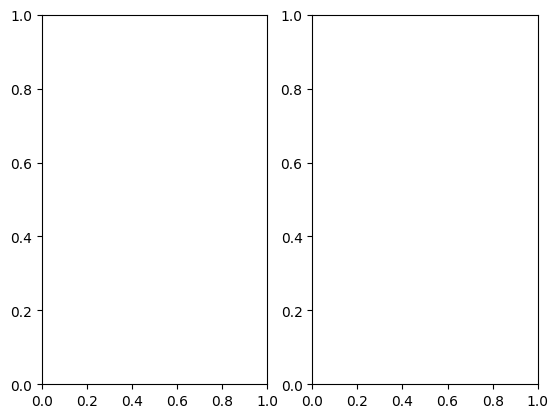

In [25]:
fig, axs = plt.subplots(1, 2)

In [28]:
axs

array([<Axes: >, <Axes: >], dtype=object)

In [ ]:


for i, ax in enumerate(axs):

    ax[i].plot()



SyntaxError: expected ':' (1657657669.py, line 3)

In [29]:
heart_rate[:][0]

[1742079600000, None]

In [36]:
timestamp = [data[0] for data in heart_rate]
date_hour = [timestamp_to_date(data[0]) for data in heart_rate]
bpm = [data[1] for data in heart_rate]

print(timestamp[1]-timestamp[0], timestamp[2]-timestamp[1],len(date_hour),date_hour)
print(len(date_hour), len(bpm))

8880000 120000 306 ['2025-03-16T00:00:00', '2025-03-16T02:28:00', '2025-03-16T02:30:00', '2025-03-16T02:32:00', '2025-03-16T02:34:00', '2025-03-16T02:36:00', '2025-03-16T02:38:00', '2025-03-16T02:40:00', '2025-03-16T02:42:00', '2025-03-16T02:44:00', '2025-03-16T02:46:00', '2025-03-16T02:48:00', '2025-03-16T02:50:00', '2025-03-16T02:52:00', '2025-03-16T02:54:00', '2025-03-16T02:56:00', '2025-03-16T02:58:00', '2025-03-16T03:00:00', '2025-03-16T03:02:00', '2025-03-16T03:04:00', '2025-03-16T03:06:00', '2025-03-16T03:08:00', '2025-03-16T03:10:00', '2025-03-16T03:12:00', '2025-03-16T03:14:00', '2025-03-16T03:16:00', '2025-03-16T03:18:00', '2025-03-16T03:20:00', '2025-03-16T03:22:00', '2025-03-16T03:24:00', '2025-03-16T03:26:00', '2025-03-16T03:28:00', '2025-03-16T03:30:00', '2025-03-16T03:32:00', '2025-03-16T03:34:00', '2025-03-16T03:36:00', '2025-03-16T03:38:00', '2025-03-16T03:40:00', '2025-03-16T03:42:00', '2025-03-16T03:44:00', '2025-03-16T03:46:00', '2025-03-16T03:48:00', '2025-03-16T03

Text(0.5, 1.0, 'Heart rate evolution during the data')

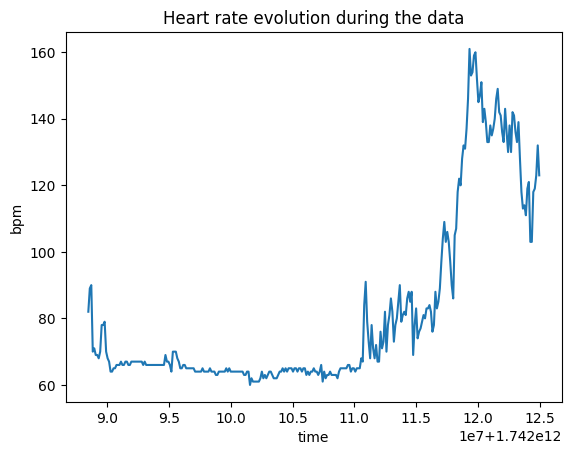

In [ ]:
plt.plot(timestamp, bpm)
plt.xlabel('time')
plt.ylabel('bpm')
plt.title('Heart rate evolution during the day')

# Example

### From medium

https://medium.com/@datascienceandvisualisation/a-walkthrough-of-downloading-and-analysing-garmin-connect-data-using-python-b38c51f2fd85

## From garmin connect

https://pypi.org/project/garminconnect/0.1.21/#description